In [2]:
from shor_code_package.shor_code import ShorQubit, ShorCircuit, ConcatenatedShorQubit
from qiskit.quantum_info import Operator, Statevector, StabilizerState
import qiskit.quantum_info as qi
from qiskit import AncillaRegister, QuantumCircuit, ClassicalRegister, transpile, generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.noise import ReadoutError, NoiseModel
import numpy as np
from qiskit.circuit.library import LinearFunction
from matplotlib import pyplot as plt
from qiskit.circuit import CircuitInstruction



# sc = ShorQubit()
# encoder = sc.encoder()
# encoder.draw('mpl')

# s = Statevector.from_label("0"*9)
# s2 = s.evolve(Operator(encoder))
# s2.draw('latex')

# encoder.draw('mpl')

# This function accepts a QuantumCircuit in addition to single instructions
# Note: you can modify it to accept a dictionary of label-instruction pairs.
def split_by_instruction(self, instruction_label):
    indices = []
    for index, circuit_instruction in enumerate(self._data):
        if circuit_instruction.label == instruction_label:
            print(circuit_instruction)
            indices.append(index)
    
    indices.append(len(self._data)) #Include final instruction

    sub_circuits = []
    previous_index = -1
    for index in indices:
        qc = self.copy_empty_like()
        print(type(qc))
        for instruction in self._data[previous_index + 1 : index]:
            qc._data.append(instruction)
        previous_index = index
        sub_circuits.append(qc)
    return sub_circuits

QuantumCircuit.split_by_instruction = split_by_instruction


sc = ShorCircuit([2])
the_code = sc.codes[0]._inner_code
error_correction_circuit2 = sc.codes[0].syndrome_correction_circuit()
error_correction_circuit = the_code.syndrome_correction_circuit()

error_correction_circuits = [error_correction_circuit, error_correction_circuit2]

sc.error_correct(0)
sc.barrier()
sc.h(0, True)
sc.barrier()
sc.error_correct(0)
#cr = ClassicalRegister(8)
#sc.add_register(cr)
#sc.error_correct(0)
#sc.h(0, True)

#sc.h(0, False)

def insert_error_correction(self):
    original_circuit = self.copy()
    original_circuit = original_circuit.decompose()

    error_corrections = []
    self.decompose()
    for index, circuit_instruction in enumerate(original_circuit._data):
        if circuit_instruction.name == "ErrorCorrect":
            qubits = circuit_instruction.qubits
            n = int(circuit_instruction.label[-1]) #Last character is depth
            error_corrections.append((index, n, qubits))
    
    previous_index = -1
    final_index = len(original_circuit._data)
    self.clear() #Reconstruct the circuit with error correction inserted.

    for error_correction in [*error_corrections, (final_index,None,None)]:
        index, n, qubits = error_correction
        for instruction in original_circuit._data[previous_index + 1 : index]: #Skip the ErrorCorrect instruction
            self._data.append(instruction)
        previous_index = index
        if index == final_index:
            break
        self.compose(error_correction_circuits[n-1], qubits = [*qubits, 81], inplace=True)
    return self

QuantumCircuit.insert_error_correction = insert_error_correction


#display(sc._circuit.decompose().draw(fold=-1))
sub_circuits = sc._circuit.insert_error_correction()
#sub_circuits = sc._circuit.insert_error_correction("Error_correct_1")
#display(sc._circuit.draw(fold=-1))
#display(sc.get_circuit().draw(fold=-1))
sub_circuits.draw(fold=-1)


aer = AerSimulator(method='stabilizer')
passManager = generate_preset_pass_manager(1, aer)
tqc = passManager.run(sc.get_circuit())

#tqc.draw(fold=-1)

result = aer.run(tqc, shots=1)



thread '<unnamed>' panicked at crates/circuit/src/dag_circuit.rs:5703:59:
called `Option::unwrap()` on a `None` value
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: called `Option::unwrap()` on a `None` value

In [ ]:
from shor_code_package.shor_code import ShorQubit, ShorCircuit, ConcatenatedShorQubit
from qiskit.quantum_info import Operator, Statevector, StabilizerState
import qiskit.quantum_info as qi
from qiskit import AncillaRegister, QuantumCircuit, ClassicalRegister, transpile, generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.noise import ReadoutError, NoiseModel
import numpy as np
from qiskit.circuit.library import LinearFunction
from matplotlib import pyplot as plt
from qiskit.circuit import CircuitInstruction

sc = ShorCircuit([3])
#sc.h(0)
#sc.decoder(0)
#sc._circuit.h(0)

classical_register = ClassicalRegister(256)
sc.add_register(classical_register)

sc._circuit.measure_all()

#qc.draw(fold=-1)
#measurement_register = ClassicalRegister(1)
#sc.add_register(measurement_register)
#sc.measure(0,measurement_register)

#display(sc.draw(fold=-1))

qc = sc.get_circuit(classical_register=classical_register)

aer = AerSimulator(method='stabilizer')
pass_manager = generate_preset_pass_manager(1, aer)
tqc = pass_manager.run(qc)

result= aer.run(tqc, shots = 1000).result()

print(result.get_counts().items())
sum([count for (key, count) in result.get_counts().items() if (int.bit_count(int(key.split(" ")[0])))%2==0])/1000


dict_items([('0111000000000000000000111000111111111111000000111000111000111111000111000111000000000000000000111000000111000111000111111000000000000111000000111111000000000000000111111000000000000000000000000000000000000000111000111000000111000000000111111111111000111000111111111000111111111111000000111111000111000000111000111111000111000111000111111000111111111000000111111111000000000111000111000000111000000111000111000111111000000111000111000000000000111000111111111000000111000111111000000000111 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 1), ('00001110001110000000001111111111111110000001110000000001111110001110001111111110000000000001111110001110001111110000000000000000000001111110001111110001111110001111111111110001110001111110001110001110001110000000001111111111111111111

0.505

In [45]:
print(result.get_counts().items())
sum([count for (key, count) in result.get_counts().items() if (int.bit_count(int(key.split(" ")[0][1:])))%2==0])/1000


dict_items([('0000000111 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 137), ('0000111111 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 133), ('0111000111 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 121), ('0000000000 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

0.879

In [28]:
for x in result.get_counts():
    print(x)

01 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [4]:
sc = ShorCircuit([1])
sc.error_correct(0,legacy=True)
sc._circuit.draw(fold=-1)

┌───────────┐┌──────────────┐                  ┌──────────────┐                                                                                                                                                                                                  ┌──────────────┐                  ┌──────────────┐                                                                                                                                                                                                  ┌──────────────┐                  ┌──────────────┐             ┌───────────────────────────────────                                                                    ┌──────── ┌─────────────────────────────────── ┌───┐ ───────┐  ───────┐      ┌──────────────┐                  ┌──────────────┐             ┌───────────────────────────────────                                                                    ┌──────── ┌─────────────────────────────────── ┌───┐ ───────┐  ───────┐ 
 q_0: ┤0          ├┤0             ├──────────────────┤0             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0             ├──────────────────┤0             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0             ├──────────────────┤0             ├─────────────┤                                    ───────────────────────────────────────────────────────────────────┤         ┤ If-1 false | c3[5] == true & true  ┤ X ├  End-1 ├─        ├──────┤0             ├──────────────────┤0             ├─────────────┤                                    ───────────────────────────────────────────────────────────────────┤         ┤                                    ┤ Z ├        ├─        ├─
      │           ││              │                  │              │                                                                                                                                                                                                  │              │                  │              │                                                                                                                                                                                                  │              │                  │              │             │                                    ┌─────────────────────────────────── ┌───┐┌────────       ───────┐ │         └─────────────────╥───────────────── └───┘ ───────┘         │      │              │                  │              │             │                                                                                                       │         │                                    ├───┤        │         │ 
 q_1: ┤1          ├┤1             ├──────────────────┤1             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1             ├──────────────────┤1             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1             ├──────────────────┤1             ├─────────────┤ If-0 false | c3[4] == true & true  ┤                                    ┤ X ├┤         ─────        ├─┤ Else-0  ──────────────────╫─────────────────────────────────  End-0 ├──────┤1             ├──────────────────┤1             ├─────────────┤                                    ───────────────────────────────────────────────────────────────────┤         ┤ If-1 false | c3[7] == true & true  ┤ Z ├  End-1 ├─        ├─
      │           ││              │       

In [31]:
xs = [[1,2],[4,4]]
xs[:,0]

TypeError: list indices must be integers or slices, not tuple

In [28]:
qc = QuantumCircuit(1)
qc.add_register(ClassicalRegister(3))
qc.add_bits(ClassicalRegister(7))

qc.draw()

qc.cregs


[ClassicalRegister(3, 'c37')]

In [5]:
csq = ConcatenatedShorQubit(1)
display(csq.syndrome_correction_circuit().draw(fold=-1))
print(csq.syndrome_correction_circuit()._data)#.to_instruction()


┌──────────────┐                  ┌──────────────┐                                                                                                                                                                                                  ┌──────────────┐                  ┌──────────────┐                                                                                                                                                                                                  ┌──────────────┐                  ┌──────────────┐             ┌───────────────────────────────────                                                                    ┌──────── ┌─────────────────────────────────── ┌───┐ ───────┐  ───────┐      ┌──────────────┐                  ┌──────────────┐             ┌───────────────────────────────────                                                                    ┌──────── ┌─────────────────────────────────── ┌───┐ ───────┐  ───────┐ 
 q_0: ─────┤0             ├──────────────────┤0             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0             ├──────────────────┤0             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0             ├──────────────────┤0             ├─────────────┤                                    ───────────────────────────────────────────────────────────────────┤         ┤ If-1 false | c5[5] == true & true  ┤ X ├  End-1 ├─        ├──────┤0             ├──────────────────┤0             ├─────────────┤                                    ───────────────────────────────────────────────────────────────────┤         ┤                                    ┤ Z ├        ├─        ├─
           │              │                  │              │                                                                                                                                                                                                  │              │                  │              │                                                                                                                                                                                                  │              │                  │              │             │                                    ┌─────────────────────────────────── ┌───┐┌────────       ───────┐ │         └─────────────────╥───────────────── └───┘ ───────┘         │      │              │                  │              │             │                                                                                                       │         │                                    ├───┤        │         │ 
 q_1: ─────┤1             ├──────────────────┤1             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1             ├──────────────────┤1             ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1             ├──────────────────┤1             ├─────────────┤ If-0 false | c5[4] == true & true  ┤                                    ┤ X ├┤         ─────        ├─┤ Else-0  ──────────────────╫─────────────────────────────────  End-0 ├──────┤1             ├──────────────────┤1             ├─────────────┤                                    ───────────────────────────────────────────────────────────────────┤         ┤ If-1 false | c5[7] == true & true  ┤ Z ├  End-1 ├─        ├─
           │              │                  │              │                  

ReadoutError([[0.9 0.1]
 [0.9 0.1]])

In [258]:
from qiskit.circuit.classical import expr, types

p = 0.5
error = ReadoutError([[1-p,p],[1-p,p]])
n = 1
qc = QuantumCircuit(2)
cr = ClassicalRegister(n)
qc.add_register(cr)

rr = ClassicalRegister(1)
qc.add_register(rr)

for c in cr:
    qc.measure(0, c)

noise_model = NoiseModel()
noise_model.add_readout_error(error, [0])

allowed_bit_strings = [i for i in range(2**n) if int.bit_count(i) > n/2]
print(allowed_bit_strings)

ex = expr.equal(cr, allowed_bit_strings[0])
for i in range(1, len(allowed_bit_strings)):
    ex = expr.bit_or(expr.equal(cr, allowed_bit_strings[i]), ex)


ex2 = expr.lift(False)
for bit_string in allowed_bit_strings:
    equivalence_relations = [expr.equal(c, bool(int(bit))) for c, bit in zip(cr, format(bit_string, f"0{n}b"))]
    clause = expr.lift(True)
    for er in equivalence_relations:
        clause = expr.bit_and(er, clause)
    ex2 = expr.logic_or(clause, ex2)
    print(ex2)


with qc.if_test(ex2):
    qc.x(1)

qc.measure(1, rr)

qc.draw(fold=-1)
aer = AerSimulator()

pass_manager = generate_preset_pass_manager(1, aer) #Optimization level = 1 or else it won't work.
tqc = pass_manager.run(qc)
tqc.draw(fold=-1)
result = aer.run(qc, noise_model=noise_model).result()
print(result.get_counts())

tqc.draw(fold=-1)

[1]
Binary(Binary.<Op.LOGIC_OR: 5>, Binary(Binary.<Op.BIT_AND: 1>, Binary(Binary.<Op.EQUAL: 6>, Var(<Clbit register=(1, "c364"), index=0>, Bool()), Value(1, Bool()), Bool()), Value(1, Bool()), Bool()), Value(0, Bool()), Bool())
{'0 0': 541, '1 1': 483}


┌─┐                                                            
   q_0: ┤M├────────────────────────────────────────────────────────────
        └╥┘┌──────────────────────────────────────── ┌───┐ ───────┐ ┌─┐
   q_1: ─╫─┤ If-0 c364[0] == true & true || fals...  ┤ X ├  End-0 ├─┤M├
         ║ └───────────────────╥──────────────────── └───┘ ───────┘ └╥┘
         ║                 ┌───╨────┐                                ║ 
c364: 1/═╩═════════════════╡ [expr] ╞════════════════════════════════╬═
         0                 └────────┘                                ║ 
c365: 1/═════════════════════════════════════════════════════════════╩═
                                                                     0

In [251]:
print(allowed_bit_strings[0])
0b0101 & (1 << 2)

n = 7
bool(format(0b001010, f"0{n}b")[5])

3


True

In [229]:
int(bin(0b1010)[::-1][:-2])
bool(1)

True

In [1]:
sc = ShorCircuit([2])
sc.x(0)
sc.h(0)
sc._circuit.measure_all()

aer = AerSimulator()
result = aer.run(sc.get_circuit().decompose()).result()
result.get_counts()


NameError: name 'ShorCircuit' is not defined

In [3]:
sc = ShorCircuit([2])
sc._circuit.x(0)
#sc._circuit.x(9)
sc.s(0, True)
#sc.h(1, True)
#sc.error_correct(0)
#sc.error_correct(0)
#sc.error_correct(1)

sc._circuit.measure_all()

aer = AerSimulator(method = 'stabilizer')
pass_manager = generate_preset_pass_manager(1, aer)
tqc = pass_manager.run(sc.get_circuit())
display(tqc.draw(fold=-1))
result = aer.run(tqc).result()

result.get_counts()


thread '<unnamed>' panicked at crates/circuit/src/dag_circuit.rs:5703:59:
called `Option::unwrap()` on a `None` value
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: called `Option::unwrap()` on a `None` value

In [46]:
sc = ShorCircuit([1])
sc.error_correct(0)
sc.get_circuit().draw()

┌───────────┐┌──────────────────┐
q_0: ┤0          ├┤0                 ├
     │           ││                  │
q_1: ┤1          ├┤1                 ├
     │           ││                  │
q_2: ┤2          ├┤2                 ├
     │           ││                  │
q_3: ┤3          ├┤3                 ├
     │           ││                  │
q_4: ┤4 Encoder0 ├┤4 Error_correct_1 ├
     │           ││                  │
q_5: ┤5          ├┤5                 ├
     │           ││                  │
q_6: ┤6          ├┤6                 ├
     │           ││                  │
q_7: ┤7          ├┤7                 ├
     │           ││                  │
q_8: ┤8          ├┤8                 ├
     └───────────┘└──────────────────┘
q_9: ─────────────────────────────────

In [1]:
from shor_code_package.shor_code import ShorQubit, ShorCircuit, ConcatenatedShorQubit
from qiskit.quantum_info import Operator, Statevector, StabilizerState
import qiskit.quantum_info as qi
from qiskit import AncillaRegister, QuantumCircuit, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.circuit.library import LinearFunction

sc = ShorCircuit([2,1])
sc.encoder(0)
sc.encoder(1)
#sc.encoder(2)
inputs = sc.input_qubit_indices

state_prep = QuantumCircuit(sc.num_qubits)
#state_prep.h(inputs[0])
#state_prep.s(inputs[0])
state_prep.x(inputs[0])
state_prep.cx(inputs[0],inputs[1])
#state_prep.h(inputs[1])
#state_prep.cx(inputs[1],inputs[2])
target_qc = sc.get_circuit().compose(state_prep, front=True)
target = StabilizerState(target_qc)

sc.barrier()
#sc.h(0)
#sc.h(0)
sc.x(0)
sc.cx(0,1, False)
#sc.h(1)
#sc.s(1)
#sc.cx(1,2)
#sc._circuit.decompose().draw(fold = -1)
qc = sc.get_circuit()
qc.save_stabilizer()

#display(target_qc.decompose().draw(fold=-1))
#display(qc.draw(fold=-1))
display(qc.decompose().draw(fold=-1))

print("Starting sim")
aer = AerSimulator(method='stabilizer')
result = aer.run(qc.decompose(), shots = 1).result()
print("End sim")
final_stabilizer = result.data()['stabilizer']


#sc._encoder().draw()
print(target.equiv(final_stabilizer))

print(target)
print(final_stabilizer)


#2'10 to construt the circuit. stopped sim at 3.50. Try with a single shot.
#Too long even for a single shot. A single shot took 3 minutes.

┌───┐                    ┌───┐                     ░ ┌───┐                                                                                                                                                                                                                                                    stabilizer 
 q_0: ──■─────────■──┤ H ├──■────■────■────■──┤ H ├──■────■─────────────░─┤ X ├─■─────■────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
        │         │  └───┘  │    │    │    │  └───┘┌─┴─┐  │             ░ ├───┤ │     │        │                                                                                                                                                                                                                                       ░      
 q_1: ──┼─────────┼─────────┼────┼────┼────┼───────┤ X ├──┼─────────────░─┤ X ├─┼──■──┼─────■──┼────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
        │         │         │    │    │    │       └───┘┌─┴─┐           ░ ├───┤ │  │  │     │  │        │                                                                                                                                                                                                                              ░      
 q_2: ──┼─────────┼─────────┼────┼────┼────┼────────────┤ X ├───────────░─┤ X ├─┼──┼──┼──■──┼──┼─────■──┼────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
        │         │         │    │  ┌─┴─┐  │  ┌───┐     └───┘           ░ ├───┤ │  │  │  │  │  │     │  │        │                                                                                                                                                                                                                     ░      
 q_3: ──┼─────────┼─────────┼────┼──┤ X ├──┼──┤ H ├──■────■─────────────░─┤ X ├─┼──┼──┼──┼──┼──┼──■──┼──┼─────■──┼────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
        │         │         │    │  └───┘  │  └───┘┌─┴─┐  │             ░ ├───┤ │  │  │  │  │  │  │  │  │     │  │        │                                                                                                                                                                                                            ░      
 q_4: ──┼─────────┼─────────┼────┼─────────┼───────┤ X ├──┼─────────────░─┤ X ├─┼──┼──┼──┼──┼──┼──┼──┼──┼──■──┼──┼─────■──┼────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
        │         │         │    │         │       └───┘┌─┴─┐           ░ ├───┤ │  │  │  │  │  │  │  │  │  │  │  │     │  │        │                                                                                                                                                                                                   ░      
 q_5: ──┼─────────┼─────────┼────┼─────────┼────────────┤ X ├───────────░─┤ X ├─┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──■──┼──┼─────■──┼────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
 

Starting sim
End sim
True
StabilizerState(['-IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIZIIZIIZIIZIIZIIZIIZ', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZ', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXXXX', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXIIIXXX', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXIIIIIIXXX

In [4]:
sc = ShorCircuit([2,2])
sc.h(0)
sc.s(1)

sc.get_circuit().draw(fold=-1)

┌────────────┐┌────────────┐                                                                                                                                      ┌───┐                                                                                                                                                ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
print("Starting sim")
aer = AerSimulator(method='stabilizer')
result = aer.run(qc.decompose(), shots = 10).result()
print("End sim")
final_stabilizer = result.data()['stabilizer']

Starting sim
End sim


In [3]:
print(target.equiv(final_stabilizer))

True


In [3]:
class X:
    y = 0
    def hello(self):
        if self.y == 0:
            print("Hello")
            self.y = 1
        else:
            print("Hi again!")

x = X()
y = X()

ar = [x,x,y]

for a in ar:
    a.hello()


Hello
Hi again!
Hello


In [3]:
sc = ShorCircuit([0,0,0])

sc.encoder(0)
sc.encoder(1)
sc.encoder(2)
sc.barrier()
#Bell pair
sc.h(1)
#sc.cx(1,2)

#Teleportation
sc.h(0)
sc.cx(1,2)

#sc.error_correct(1)


sc.get_circuit().decompose().draw(fold=-1)

░ ┌───┐        
q_0: ─░─┤ H ├────────
      ░ ├───┤        
q_1: ─░─┤ H ├─■──────
      ░ ├───┤ │ ┌───┐
q_2: ─░─┤ H ├─■─┤ H ├
      ░ └───┘   └───┘
q_3: ─░──────────────
      ░

In [21]:
#qi.Clifford.from_label('I' * 81)

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)

#print(qc.data)

csq = ConcatenatedShorQubit(1)
#print(csq.logical_H().draw(fold = -1))

#csq.logical_H().data[10].qubits[0].index

for gate in qc.data:
    #print(gate)
    print('\ngate name:', gate.name)
    print('qubit(s) acted on:', gate.qubits[0])
    print(qc.find_bit(gate.qubits[-1]).index)
csq.logical_H().draw(fold=-1)



gate name: h
qubit(s) acted on: <Qubit register=(3, "q"), index=0>
0

gate name: cx
qubit(s) acted on: <Qubit register=(3, "q"), index=0>
1


┌───┐                                                       ┌───┐                                                                                                                                       
q_0: ┤ H ├───────────────────────────────────────────────■───────┤ X ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ├───┤                                             ┌─┴─┐┌───┐└─┬─┘┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐     ┌───┐     
q_1: ┤ S ├──■────■────■─────────■────■─────────■────■──┤ X ├┤ H ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ S ├──■──┤ X ├─────
     ├───┤┌─┴─┐  │    │         │    │         │    │  └───┘└───┘     └─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘┌─┴─┐├───┤┌───┐
q_2: ┤ S ├┤ X ├──┼────┼─────────┼────┼─────────┼────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────┤ X ├┤ S ├┤ Y ├
     ├───┤└───┘┌─┴─┐  │  ┌───┐  │    │         │    │                   │         │         │         │         │         │         │         │         │         │         │       ┌─┴─┐┌───┐└───┘└───┘└───┘
q_3: ┤ S ├─────┤ X ├──┼──┤ S ├──┼────┼─────────┼────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├───────────────
     ├───┤     └───┘┌─┴─┐├───┤  │    │         │    │                   │         │         │         │         │         │         │         │         │       ┌─┴─┐┌───┐          └───┘└───┘               
q_4: ┤ S ├──────────┤ X ├┤ S ├──┼────┼─────────┼────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├───────────────────────────────────
     ├───┤          └───┘└───┘┌─┴─┐  │  ┌───┐  │    │                   │         │         │         │         │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                                   
q_5: ┤ S ├────────────────────┤ X ├──┼──┤ S ├──┼────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├───────────────────────────────────────────────────────
     ├───┤                    └───┘┌─┴─┐├───┤  │    │                   │         │         │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                                                       
q_6: ┤ S ├─────────────────────────┤ X ├┤ S ├──┼────┼───────────────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├───────────────────────────────────────────────────────────────────────────
     ├───┤                         └───┘└───┘┌─┴─┐  │  ┌───┐            │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                                                                           
q_7: ┤ S ├───────────────────────────────────┤ X ├──┼──┤ S ├────────────┼─────────┼─────────■───────┤ X ├┤ Y ├───────────────────────────────────────────────────────────────────────────────────────────────
     ├───┤                                   └───┘┌─┴─┐├───┤            │       ┌─┴─┐┌───┐          └───┘└───┘                                                                                               
q_8: ┤ S ├────────────────────────────────────────┤ X ├┤ S ├────────────■───────┤ X ├┤ Y ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     └───┘                                        └───┘└───┘                    └───┘└───┘

In [38]:
n = 2
c = ConcatenatedShorQubit(n)

aer = AerSimulator(method='stabilizer')

qc = QuantumCircuit(9**n + 1)
qc.compose(c.encoder(), range(9**n), inplace=True)
qc.x(0)
#qc.y(4)


qc.compose(c.syndrome_correction_circuit(), inplace=True)
qc.save_stabilizer()

#rcs = c.get_recovering_circuits(True)
#np.array()

tqc = transpile(qc, aer)

result = aer.run(tqc, shots = 1).result()

#tqc.draw(fold=-1)

f = result.data()['stabilizer']
print(result.data())

{'counts': {'0x200000000000000000': 1}, 'stabilizer': StabilizerState(['+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIZIIZIIZIIZIIZIIZIIZIIZ', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZ', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXXXX', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXIIIXXX', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXIIIIIIXXX', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

## Which Y flips are correctable?

In [ ]:
sc = ShorCircuit([1], include_ancilla=False)
sc.h(0)
sc.s(0)
target = Statevector(sc.get_circuit())
results = []
for ys in [(1,0,0),(2,0,0),(1,1,0),(3,0,0),(2,1,0),(1,1,1),(3,1,0),(2,2,0),(2,1,1),(3,2,0),(3,1,1),(2,2,1)]:
    sc = ShorCircuit([1])
    sc.h(0)
    sc.s(0)
    qc = sc._circuit

    y1,y2,y3 = ys
    for i in range(y1):
        qc.y(i)
    for i in range(y2):
        qc.y(i+3)
    for i in range(y3):
        qc.y(i+6)

    sc.error_correct(0)

    qc.save_density_matrix(label='p', qubits=range(9))
    aer = AerSimulator(method='density_matrix')
    result = aer.run(qc.decompose(), shots = 1).result()
    equal = target.equiv(result.data()['p'].to_statevector())
    print(ys, equal)
    results.append(equal)

(1, 0, 0) True
(2, 0, 0) False
(1, 1, 0) False
(3, 0, 0) False
(2, 1, 0) False
(1, 1, 1) False
(3, 1, 0) True
(2, 2, 0) True
(2, 1, 1) True
(3, 2, 0) True
(3, 1, 1) True
(2, 2, 1) True


In [22]:
sc = ShorCircuit([1], include_ancilla=False)
qc = QuantumCircuit(9)
qc.rz(np.pi/8, 0)
sc._circuit.compose(qc, front=True)
target = Statevector(sc.get_circuit())
results = []
for ys in [(1,0,0),(2,0,0),(1,1,0),(3,0,0),(2,1,0),(1,1,1),(3,1,0),(2,2,0),(2,1,1),(3,2,0),(3,1,1),(2,2,1)]:
    sc = ShorCircuit([1])
    sc.h(0)
    sc.s(0)
    qc = sc._circuit

    y1,y2,y3 = ys
    for i in range(y1):
        qc.y(i)
    for i in range(y2):
        qc.y(i+3)
    for i in range(y3):
        qc.y(i+6)

    sc.error_correct(0)

    qc.save_density_matrix(label='p', qubits=range(9))
    aer = AerSimulator(method='density_matrix')
    result = aer.run(qc.decompose(), shots = 1).result()
    equal = target.equiv(result.data()['p'].to_statevector())
    print(ys, equal)
    results.append(equal)

(1, 0, 0) False
(2, 0, 0) False
(1, 1, 0) False
(3, 0, 0) False


KeyboardInterrupt: 

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from shor_code_package.experiments import NoiseModelExperiment
from shor_code_package.shor_code import ShorCircuit
from qiskit_aer.noise import pauli_error, NoiseModel

inputs = [(pz,0,0,theta) for pz in np.linspace(0,0.33,10) for theta in np.linspace(0,2*np.pi,36)]#[(pz,px,py,theta)]

#Define noise model
def noise_model_generator(input):
    #Set up noise model
    num_qubits = 9**1
    px, pz, py = input
    x_error = pauli_error([('II', 1-(px)),('XI', px)]) #X I = Target Control
    z_error = pauli_error([('II', 1-(pz)),('ZI', pz)])
    y_error = pauli_error([('II', 1-(py)),('YI', py)])
    error = x_error.compose(z_error.compose(y_error))
    noise_model = NoiseModel()
    for q in range(num_qubits):
        noise_model.add_quantum_error(error, ['cx'], [num_qubits+1, q]) #The error is applied after applying an entangling gate from an unused ancilla.
    return noise_model

sc = ShorCircuit([1])
qc = QuantumCircuit(9)
qc.rz()
sc._circuit.compose()




36*10

TypeError: QuantumCircuit.rz() missing 2 required positional arguments: 'phi' and 'qubit'

In [4]:
csq = ConcatenatedShorQubit(1)

print(csq.syndrome_correction_circuit_2().decompose().draw(fold = -1))

#print(len(csq.get_stabilizers(True)), len(csq.get_recovering_circuits(True)), len(csq.get_stabilizers(True))/len(csq.get_recovering_circuits(True)))

           ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ┌───┐┌───┐                 ┌──────                                                            ┌────────    ┌──────   ┌──────────┐ ───────┐  ───────┐                                                                                         ┌───┐                            ┌──────                                                    ┌────────    ┌──────   ┌──────┐ ───────┐  ───────┐                       
  q_0: ────┤ H ├────────────────────────────────────────────────────────────────────────────────

In [ ]:
#qc.decompose().draw(fold = -1)





In [74]:
xs = ClassicalRegister(4)

np.split(np.array(xs), len(xs)//2)
xs

ClassicalRegister(4, 'c649')

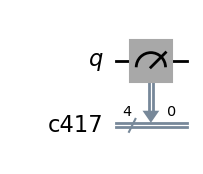

In [22]:
qc1 = QuantumCircuit(1)
creg = ClassicalRegister(4)
qc1.add_register(creg)
creg2 = ClassicalRegister(bits = [creg[0]])
qc1.add_register(creg2)
qc1.measure(0,creg[0])
qc1.draw('mpl')

In [101]:
qc2 = QuantumCircuit(1)
qc2.add_register(ClassicalRegister(3))
qc2.measure(0,0)
qc2.draw()

┌─┐
     q: ┤M├
        └╥┘
c874: 3/═╩═
         0

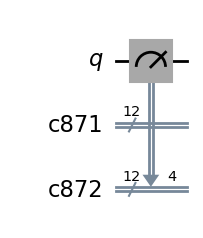

In [102]:
qc3 = qc1.compose(qc2, clbits=[16,17,18])
qc3.draw('mpl')

In [7]:
aer = AerSimulator(method = "stabilizer")
res = aer.run(transpile(qc, aer), shots = 100)

qc.num_qubits//9

qc.compose(cl)

9

In [ ]:
result = res.result()

#print(result)
stabs = result.data()['stabilizer']
#qc.draw()
len(stabs)

StabilizerState(qc).probabilities_dict()

/var/folders/rs/97dd3psn4t9g5hrhtc9qb4pm0000gn/T/ipykernel_17893/453975406.py:6: DeprecationWarning: The return type of saved stabilizers has been changed from a `dict` to a `qiskit.quantum_info.StabilizerState` as of qiskit-aer 0.10. Accessing dict attributes is deprecated and will result in an error in a future release. Use the `.clifford.to_dict()` methods to access  the stored Clifford operator and convert to a dictionary.
  len(stabs)


In [20]:
qc = QuantumCircuit(1)

s = StabilizerState(qc)
target = StabilizerState.from_stabilizer_list('Z')


s.probabilities_dict()
target.probabilities_dict()

s.equiv(target)

True

In [25]:
zl = "X"*9
xl = "Z"*9
il = "I"*9
zll = 9*xl
concatenated_code_stabilizer = [6*xl + 3*il, 
                                3*il + 6*xl, 
                                2*zl + 7*il, 
                                1*il + 2*zl + 6*il,
                                3*il + 2*zl + 4*il,
                                4*il + 2*zl + 3*il,
                                6*il + 2*zl + 1*il,
                                7*il + 2*zl,
                                ]


concatenated_code_stabilizer[0]

'ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZIIIIIIIIIIIIIIIIIIIIIIIIIII'

In [28]:

shor_code_stabilizers = ["XXXXXXIII", "IIIXXXXXX", "ZZIIIIIII", "IZZIIIIII", "IIIZZIIII", "IIIIZZIII", "IIIIIIZZI", "IIIIIIIZZ"]
zl = "X"*9
xl = "Z"*9
il = "I"*9
zll = 9*xl
concatenated_code_stabilizer = [6*xl + 3*il, 
                                3*il + 6*xl, 
                                2*zl + 7*il, 
                                1*il + 2*zl + 6*il,
                                3*il + 2*zl + 4*il,
                                4*il + 2*zl + 3*il,
                                6*il + 2*zl + 1*il,
                                7*il + 2*zl,
                                ]
inner_code_stabilizers = [n * il + scs + (8-n) * il for n in range(9) for scs in shor_code_stabilizers]

inner_code_stabilizers

StabilizerState.from_stabilizer_list([*concatenated_code_stabilizer, *inner_code_stabilizers, zll])

StabilizerState(['+ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ', '+XXXXXXXXXXXXXXXXXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IIIIIIIIIXXXXXXXXXXXXXXXXXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIXXXXXXXXXXXXXXXXXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXXXXXXXXXXXXXXXXIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXXXXXXXXXXXXXXXXIIIIIIIII', '+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXXXXXXXXXXXXXXXXX', '+XXXXXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IIIXXXXXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', '+ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', '+IZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [2]:
ghz = Statevector([1/np.sqrt(2),0,0,0,0,0,0,1/np.sqrt(2)])
target = ghz.copy() ^ ghz.copy() ^ ghz.copy()
target.is_valid()
target.draw('latex')

#qc = QuantumCircuit(9)
#qc.x(0)
#qc.compose(ShorQubit().encoder(), inplace=True)
#qc.draw('mpl')
ghz.draw('latex')

<IPython.core.display.Latex object>

In [6]:
range(5,10)

range(5, 10)

In [ ]:
aer = AerSimulator(method="statevector")

sc = ConcatenatedShorQubit(1)

#Construct Hl
xl = sc.logical_X()
zl = sc.logical_Z()

#hl = sc.logical_H_naive()#1/np.sqrt(2) * (Operator(xl) + Operator(zl))

sl = 1/2*((1+1j)*Operator.from_label("I"*9) + (1-1j)*Operator(sc.logical_Z()))


qc = QuantumCircuit(10)
#qc.x(0)
#qc.h(0)
#qc.h(0)
#qc.sdg(0)
#qc.s(0)


qc.compose(sc.encoder(), inplace = True)
qc.barrier()

#qc.compose(hl, clbits=[], inplace=True)
#qc.compose(sl, clbits=[], inplace=True)
#qc.compose(hl, clbits=[], inplace=True)

#qi.SparsePauliOp(["ZI", "XX"], coeffs=[1/np.sqrt(2), 1/np.sqrt(2)])

for i in range(9):
    #qc.x(i)
    #qc.s(i)
    #qc.x(i

    #qc.x(i)


    #qc.h(i)
    pass

#qc.compose(sc.syndrome_correction_circuit(True), inplace = True)
qc.save_density_matrix(range(9))

display(qc.draw(fold = -1))

tqc = transpile(qc, aer)
display(tqc.draw())

res = aer.run(tqc, shots = 1)

def logical_1():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, -1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz
def logical_0():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz

s = res.result().data()['density_matrix']



display(logical_0().draw('latex'))
display(s.to_statevector().draw('latex'))
display(logical_1().draw('latex'))


sc.logical_X().draw()

AttributeError: 'ConcatenatedShorQubit' object has no attribute 'logical_H_naive'

In [ ]:
import stim

aer = AerSimulator(method="statevector")

sc = ConcatenatedShorQubit(1)

#Construct Hl
xl = sc.logical_X()
zl = sc.logical_Z()

#hl = sc.logical_H_naive()
hl = 1/np.sqrt(2) * (Operator(xl) + Operator(zl))

sl = 1/2*((1+1j)*Operator.from_label("I"*9) + (1-1j)*Operator(sc.logical_Z()))


qc = QuantumCircuit(10)
#qc.x(0)
#qc.h(0)
#qc.h(0)
#qc.sdg(0)
#qc.s(0)


qc.compose(sc.encoder(), inplace = True)
qc.barrier()

#qc.compose(hl, clbits=[], inplace=True)
#qc.compose(sl, clbits=[], inplace=True)
#qc.compose(hl, clbits=[], inplace=True)

#qi.SparsePauliOp(["ZI", "XX"], coeffs=[1/np.sqrt(2), 1/np.sqrt(2)])

for i in range(9):
    #qc.x(i)
    #qc.s(i)
    #qc.x(i

    #qc.x(i)


    #qc.h(i)
    pass

#qc.compose(sc.syndrome_correction_circuit(True), inplace = True)
qc.save_density_matrix(range(9))

display(qc.draw(fold = -1))

tqc = transpile(qc, aer)
display(tqc.draw())

res = aer.run(tqc, shots = 1)

def logical_1():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, -1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz
def logical_0():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz

s = res.result().data()['density_matrix']



display(logical_0().draw('latex'))
display(s.to_statevector().draw('latex'))
display(logical_1().draw('latex'))




NameError: name 'AerSimulator' is not defined

In [28]:
csq = ConcatenatedShorQubit(1)
xl = csq.logical_X()
zl = csq.logical_Z()

hl = 1/np.sqrt(2) * (Operator(xl) + Operator(zl))
sl = 1/2*((1+1j)*Operator.from_label("I"*9) + (1-1j)*Operator(xl))

clifford = qi.Clifford.from_operator(sl)

aer = AerSimulator(method='stabilizer')

qc = QuantumCircuit(9)
qc = ConcatenatedShorQubit(1).logical_H(False)
#qc.compose(clifford.to_circuit(), inplace=True)
qc.save_stabilizer()
display(qc.draw(fold = -1))

tqc = transpile(qc, aer)
display(tqc.draw(fold=-1))

aer.run(qc, shots = 1).result().data()

┌───┐                                                                      ┌───┐                                                                                                                                        stabilizer 
q_0: ┤ H ├──────────────────────────────────────────────────────────────■───────┤ X ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
     ├───┤                                                            ┌─┴─┐┌───┐└─┬─┘┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐     ┌───┐          ░      
q_1: ┤ S ├──■────■─────────■─────────■─────────■─────────■─────────■──┤ X ├┤ H ├──■──┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ H ├┤ X ├┤ H ├──■──┤ S ├──■──┤ X ├──────────░──────
     ├───┤┌─┴─┐  │         │         │         │         │         │  └───┘└───┘     └─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘└─┬─┘└───┘  │  └───┘┌─┴─┐├───┤┌───┐     ░      
q_2: ┤ S ├┤ X ├──┼─────────┼─────────┼─────────┼─────────┼─────────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────┤ X ├┤ S ├┤ Y ├─────░──────
     ├───┤└───┘┌─┴─┐┌───┐  │         │         │         │         │                   │         │         │         │         │         │         │         │         │         │         │       ┌─┴─┐┌───┐└───┘└───┘└───┘     ░      
q_3: ┤ S ├─────┤ X ├┤ S ├──┼─────────┼─────────┼─────────┼─────────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├────────────────────░──────
     ├───┤     └───┘└───┘┌─┴─┐┌───┐  │         │         │         │                   │         │         │         │         │         │         │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                    ░      
q_4: ┤ S ├───────────────┤ X ├┤ S ├──┼─────────┼─────────┼─────────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├────────────────────────────────────────░──────
     ├───┤               └───┘└───┘┌─┴─┐┌───┐  │         │         │                   │         │         │         │         │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                                        ░      
q_5: ┤ S ├─────────────────────────┤ X ├┤ S ├──┼─────────┼─────────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├────────────────────────────────────────────────────────────░──────
     ├───┤                         └───┘└───┘┌─┴─┐┌───┐  │         │                   │         │         │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                                                            ░      
q_6: ┤ S ├───────────────────────────────────┤ X ├┤ S ├──┼─────────┼───────────────────┼─────────┼─────────┼─────────┼─────────■───────┤ X ├┤ Y ├────────────────────────────────────────────────────────────────────────────────░──────
     ├───┤                                   └───┘└───┘┌─┴─┐┌───┐  │                   │         │         │       ┌─┴─┐┌───┐          └───┘└───┘                                                                                ░      
q_7: ┤ S ├─────────────────────────────────────────────┤ X ├┤ S ├──┼───────────────────┼─────────┼─────────■───────┤ X ├┤ Y ├────────────────────────────────────────────────────────────────────────────────────────────────────░──────
     ├───┤                                             └───┘└───┘┌─┴─┐┌───┐            │       ┌─┴─┐┌───┐          └───┘└───┘                                                                                                    ░      
q_8: ┤ S ├──────────────────────────────────

global phase: π/4
     ┌────────┐┌────┐┌───────────┐                                                                                                                                 ┌────┐  ┌────────┐                                                                                                                                                                            stabilizer 
q_0: ┤ Rz(-π) ├┤ √X ├┤ Rz(-3π/2) ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■────────┤ √X ├──┤ Rz(-π) ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
     ├───────┬┘└────┘└───────────┘                                                                    ┌────┐┌─────────────┐    ┌────┐    ┌──────────┐   ┌─┴─┐   ┌──┴────┴─┐└─┬────┬─┘┌─────────────┐┌────┐        ┌───┐    ┌─────────┐    ┌──────┐   ┌───┐            ┌──────────┐┌──────┐┌───┐             ┌───┐                    ┌───┐                           ░      
q_1: ┤ Rz(π) ├───■─────────■─────────────■──────────■──────────────────■──────────■────────────────■──┤ √X ├┤ Rz(-1.4187) ├────┤ √X ├────┤ Rz(-π/2) ├───┤ X ├───┤ Rz(π/2) ├──┤ √X ├──┤ Rz(0.15207) ├┤ √X ├──■─────┤ X ├────┤ Rz(π/2) ├────┤0     ├───┤ X ├──────■─────┤ Rz(-π/2) ├┤0     ├┤ X ├─────■───────┤ X ├─────■────────■─────┤ X ├───────────────────────────░──────
     └─┬───┬─┘ ┌─┴─┐       │             │          │                  │          │                │  └────┘└─────────────┘    └────┘    └──────────┘   └───┘   └─────────┘  └────┘  └─────────────┘└────┘  │     └───┘    └─────────┘    │      │   └───┘      │     └──────────┘│      │└───┘     │       └───┘     │      ┌─┴─┐   ├───┤      ┌───┐                ░      
q_2: ──┤ S ├───┤ X ├───────┼─────────────┼──────────┼──────────────────┼──────────┼────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────┤      ├──────────────┼─────────────────┤      ├──────────┼─────────────────┼──────┤ X ├───┤ S ├──────┤ Y ├────────────────░──────
       ├───┤   └───┘     ┌─┴─┐    ┌───┐  │  ┌────┐  │  ┌────────────┐  │  ┌────┐  │  ┌──────────┐  │                                                                                                        │                             │      │              │                 │      │          │               ┌─┴─┐ ┌──┴───┴──┐├───┴┐┌────┴───┴────┐┌────┐     ░      
q_3: ──┤ S ├─────────────┤ X ├────┤ S ├──┼──┤ √X ├──┼──┤ Rz(1.7229) ├──┼──┤ √X ├──┼──┤ Rz(-π/2) ├──┼────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────┤      ├──────────────┼─────────────────┤  Ecr ├──────────┼───────────────┤ X ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(-1.4187) ├┤ √X ├─────░──────
       ├───┤             └───┘    └───┘┌─┴─┐├───┬┘  │  └───┬────┬───┘  │  └────┘  │  └──────────┘  │                                                                                                        │                             │      │              │                 │      │          │     ┌────────┐├───┴┐└┬────────┤└────┘└─────────────┘└────┘     ░      
q_4: ──┤ S ├───────────────────────────┤ X ├┤ S ├───┼──────┤ √X ├──────┼──────────┼────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────┤  Ecr ├──────────────┼─────────────────┤      ├──────────■─────┤ Rz(-π) ├┤ √X ├─┤ Rz(-π) ├────────────────────────────────░──────
       ├───┤                           └───┘└───┘ ┌─┴─┐    ├────┤      │          │                │                                                                                                        │                             │      │              │                 │      │┌───┐┌─────────┐└────────┘└────┘ └────────┘       

{'stabilizer': StabilizerState(['+YYYYYYYYX', '+YYYYYYYXY', '+YYYYYYXYY', '+YYYYYXYYY', '+YYYYXYYYY', '+YYYXYYYYY', '+YYXYYYYYY', '+YXYYYYYYY', '+XYYYYYYYY'])}

In [ ]:
aer = AerSimulator(method="stabilizer")

sc = ConcatenatedShorQubit(1)

#Construct Hl
xl = sc.logical_X()
zl = sc.logical_Z()

#hl = sc.logical_H_naive()#
hl = qi.Clifford.from_operator(1/np.sqrt(2) * (qi.Operator(xl) + qi.Ope(zl)))

sl = 1/2*((1+1j)*Operator.from_label("I"*9) + (1-1j)*Operator(sc.logical_Z()))


qc = QuantumCircuit(10)
#qc.x(0)
#qc.h(0)
#qc.h(0)
#qc.sdg(0)
#qc.s(0)


qc.compose(sc.encoder(), inplace = True)
qc.barrier()

#qc.compose(hl, clbits=[], inplace=True)
#qc.compose(sl, clbits=[], inplace=True)
qc.compose(hl, clbits=[], inplace=True)

#qi.SparsePauliOp(["ZI", "XX"], coeffs=[1/np.sqrt(2), 1/np.sqrt(2)])

for i in range(9):
    #qc.x(i)
    #qc.s(i)
    #qc.x(i

    #qc.x(i)


    #qc.h(i)
    pass

#qc.compose(sc.syndrome_correction_circuit(True), inplace = True)
qc.save_stabilizer()

display(qc.draw(fold = -1))

tqc = transpile(qc, aer)
display(tqc.draw(fold = -1))

res = aer.run(tqc, shots = 1)

def logical_1():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, -1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz
def logical_0():
    ghz = qi.Statevector([1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)])
    return ghz ^ ghz ^ ghz

s = res.result().data()['stabilizer']


sc.logical_X().draw(fold = -1)

┌───┐           ░ ┌───────────┐ stabilizer 
q_0: ──■────■──┤ H ├──■────■───░─┤0          ├─────░──────
       │    │  └───┘┌─┴─┐  │   ░ │           │     ░      
q_1: ──┼────┼───────┤ X ├──┼───░─┤1          ├─────░──────
       │    │       └───┘┌─┴─┐ ░ │           │     ░      
q_2: ──┼────┼────────────┤ X ├─░─┤2          ├─────░──────
     ┌─┴─┐  │  ┌───┐     └───┘ ░ │           │     ░      
q_3: ┤ X ├──┼──┤ H ├──■────■───░─┤3          ├─────░──────
     └───┘  │  └───┘┌─┴─┐  │   ░ │           │     ░      
q_4: ───────┼───────┤ X ├──┼───░─┤4 Clifford ├─────░──────
            │       └───┘┌─┴─┐ ░ │           │     ░      
q_5: ───────┼────────────┤ X ├─░─┤5          ├─────░──────
          ┌─┴─┐┌───┐     └───┘ ░ │           │     ░      
q_6: ─────┤ X ├┤ H ├──■────■───░─┤6          ├─────░──────
          └───┘└───┘┌─┴─┐  │   ░ │           │     ░      
q_7: ───────────────┤ X ├──┼───░─┤7          ├─────░──────
                    └───┘┌─┴─┐ ░ │           │     ░      
q_8: ────────────────────┤ X ├─░─┤8          ├─────░──────
                         └───┘ ░ └───────────┘     ░      
q_9: ──────────────────────────░───────────────────░──────
                               ░                   ░

global phase: 5π/4
                    ┌───┐           ░ ┌────────┐┌────┐┌───────────┐                                                                                                                   ┌────┐   ┌────────┐                                                                                                                      stabilizer 
q_0: ──■─────────■──┤ H ├──■────■───░─┤ Rz(-π) ├┤ √X ├┤ Rz(-3π/2) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────■─────┤ √X ├───┤ Rz(-π) ├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────░──────
       │         │  └───┘┌─┴─┐  │   ░ ├───────┬┘└────┘└───────────┘                                                                    ┌────┐┌─────────────┐┌────┐┌──────────┐┌─┴─┐┌──┴────┴──┐└─┬────┬─┘┌────────────┐┌────┐                                         ┌───┐                        ┌───┐                           ░      
q_1: ──┼─────────┼───────┤ X ├──┼───░─┤ Rz(π) ├───■─────────■─────────────■──────────■──────────────────■──────────■────────────────■──┤ √X ├┤ Rz(-1.4187) ├┤ √X ├┤ Rz(-π/2) ├┤ X ├┤ Rz(-π/2) ├──┤ √X ├──┤ Rz(2.9895) ├┤ √X ├─■─────■───────■───────■─────────■───────┤ X ├───────■──────────■─────┤ X ├───────────────────────────░──────
       │         │       └───┘┌─┴─┐ ░ └─┬───┬─┘ ┌─┴─┐       │             │          │                  │          │                │  └────┘└─────────────┘└────┘└──────────┘└───┘└──────────┘  └────┘  └────────────┘└────┘ │     │       │       │         │       └───┘       │        ┌─┴─┐   ├───┤      ┌───┐                ░      
q_2: ──┼─────────┼────────────┤ X ├─░───┤ S ├───┤ X ├───────┼─────────────┼──────────┼──────────────────┼──────────┼────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┼─────┼───────┼───────┼─────────┼───────────────────┼────────┤ X ├───┤ S ├──────┤ Y ├────────────────░──────
     ┌─┴─┐┌───┐  │            └───┘ ░   ├───┤   └───┘     ┌─┴─┐    ┌───┐  │  ┌────┐  │  ┌────────────┐  │  ┌────┐  │  ┌──────────┐  │                                                                                         │     │       │       │         │                 ┌─┴─┐   ┌──┴───┴──┐├───┴┐┌────┴───┴────┐┌────┐     ░      
q_3: ┤ X ├┤ H ├──┼────■────■────────░───┤ S ├─────────────┤ X ├────┤ S ├──┼──┤ √X ├──┼──┤ Rz(1.7229) ├──┼──┤ √X ├──┼──┤ Rz(-π/2) ├──┼─────────────────────────────────────────────────────────────────────────────────────────┼─────┼───────┼───────┼─────────┼─────────────────┤ X ├───┤ Rz(π/2) ├┤ √X ├┤ Rz(-1.4187) ├┤ √X ├─────░──────
     └───┘└───┘  │  ┌─┴─┐  │        ░   ├───┤             └───┘    └───┘┌─┴─┐├───┬┘  │  └───┬────┬───┘  │  └────┘  │  └──────────┘  │                                                                                         │     │       │       │         │     ┌────────┐  ├───┴┐  └┬────────┤└────┘└─────────────┘└────┘     ░      
q_4: ────────────┼──┤ X ├──┼────────░───┤ S ├───────────────────────────┤ X ├┤ S ├───┼──────┤ √X ├──────┼──────────┼────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┼─────┼───────┼───────┼─────────■─────┤ Rz(-π) ├──┤ √X ├───┤ Rz(-π) ├────────────────────────────────░──────
                 │  └───┘┌─┴─┐      ░   ├───┤                           └───┘└───┘ ┌─┴─┐    ├───┬┘      │  ┌────┐  │                │                                                                                         │     │       │       │     ┌────────┐└─┬────┬─┘┌─┴────┴─┐ └────────┘                                ░      
q_5: ────────────┼───────┤ X ├──────░───┤ S ├──────────────────────────────────────┤ X ├────┤ S ├───────┼──┤ √X ├──┼────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┼─────┼───────┼───────■─────┤ Rz(-π) ├──┤ √X ├──┤ Rz(-π) ├───────────────────────────────────────────░──────
         

AttributeError: 'Clifford' object has no attribute 'params'

In [20]:
qc = QuantumCircuit(4)

qc.cx(0,1)
qc.h(1)
qc.cx(1,2)
qc.cx(1,3)

qc.draw()

q_0: ──■─────────────────
     ┌─┴─┐┌───┐          
q_1: ┤ X ├┤ H ├──■────■──
     └───┘└───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

In [12]:
qi.Clifford.from_operator(Operator(hl))

Clifford(array([[False,  True,  True, False, False, False, False, False, False,
         True, False, False,  True, False, False,  True, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True, False, False, False, False, False,
         True, False, False,  True, False, False,  True, False, False,
         True],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True, False, False, 

In [11]:
512/8

64.0

In [19]:
qc = QuantumCircuit(1)

qc.x(0)

x = Operator(qc)

x.expand(x).expand(Operator.from_label('X')).draw('latex')

Operator.from_label("Z").expand(x.expand(x)).draw('latex')

<IPython.core.display.Latex object>

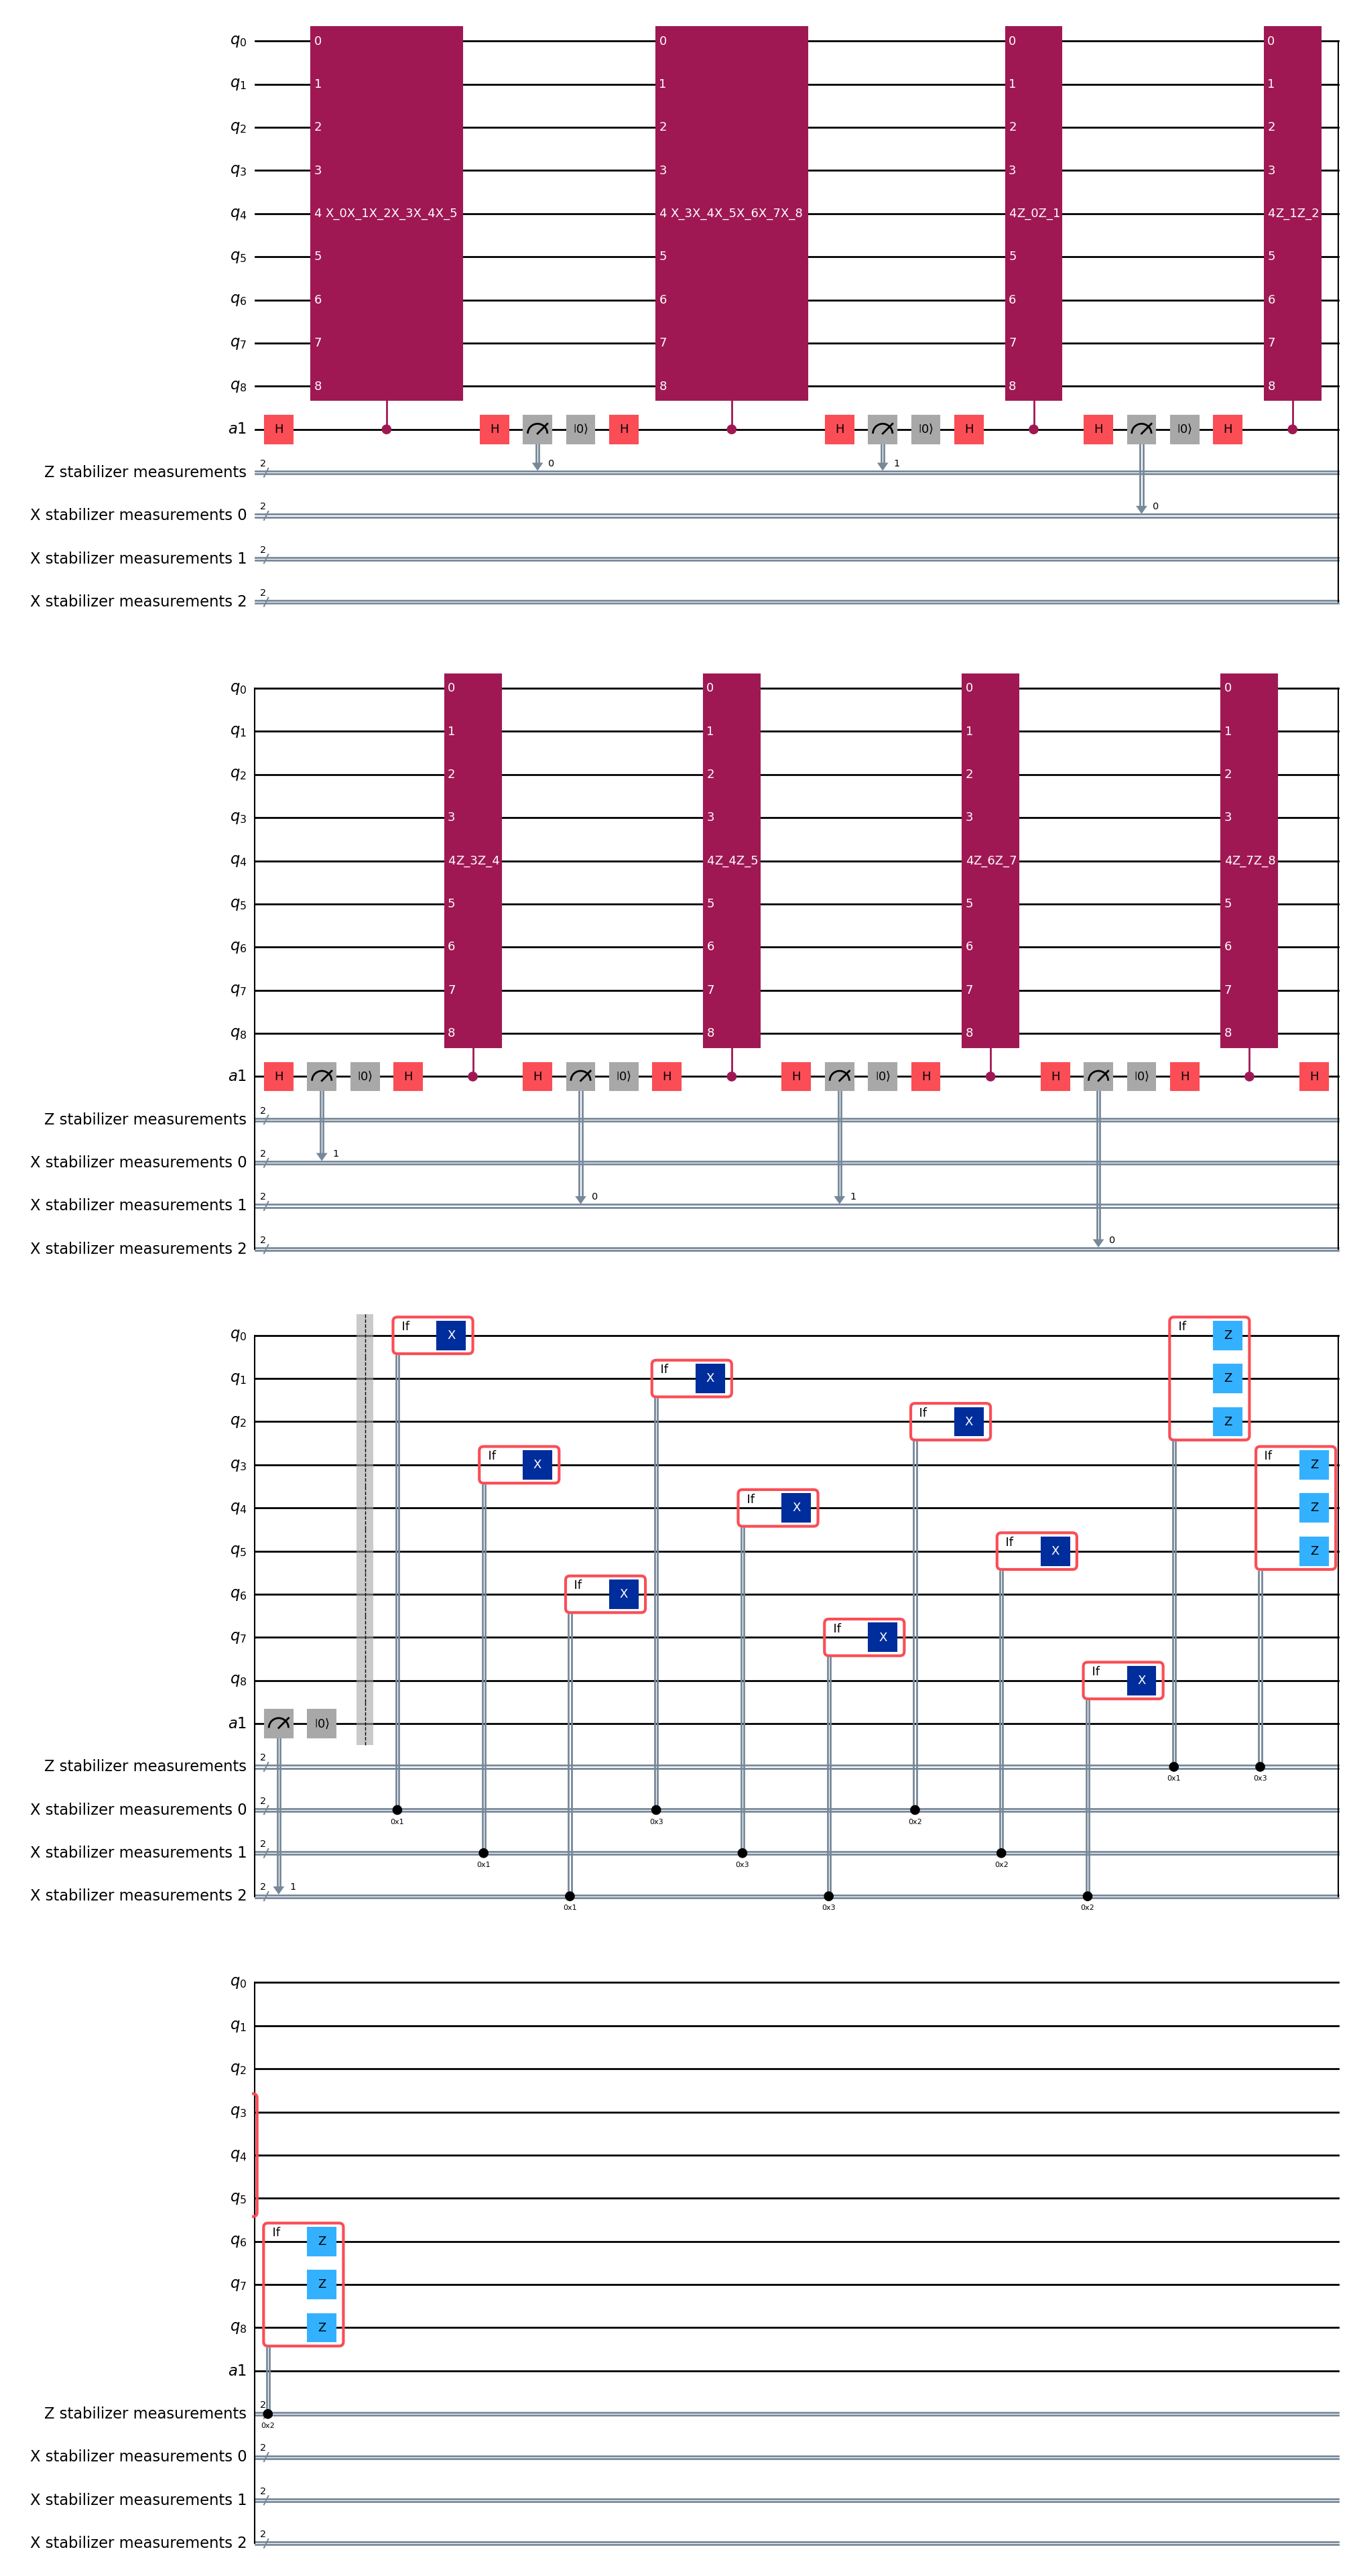

In [6]:
sq = ShorQubit()
qc = sq.syndrome_correction_circuit()

qc.draw('mpl')

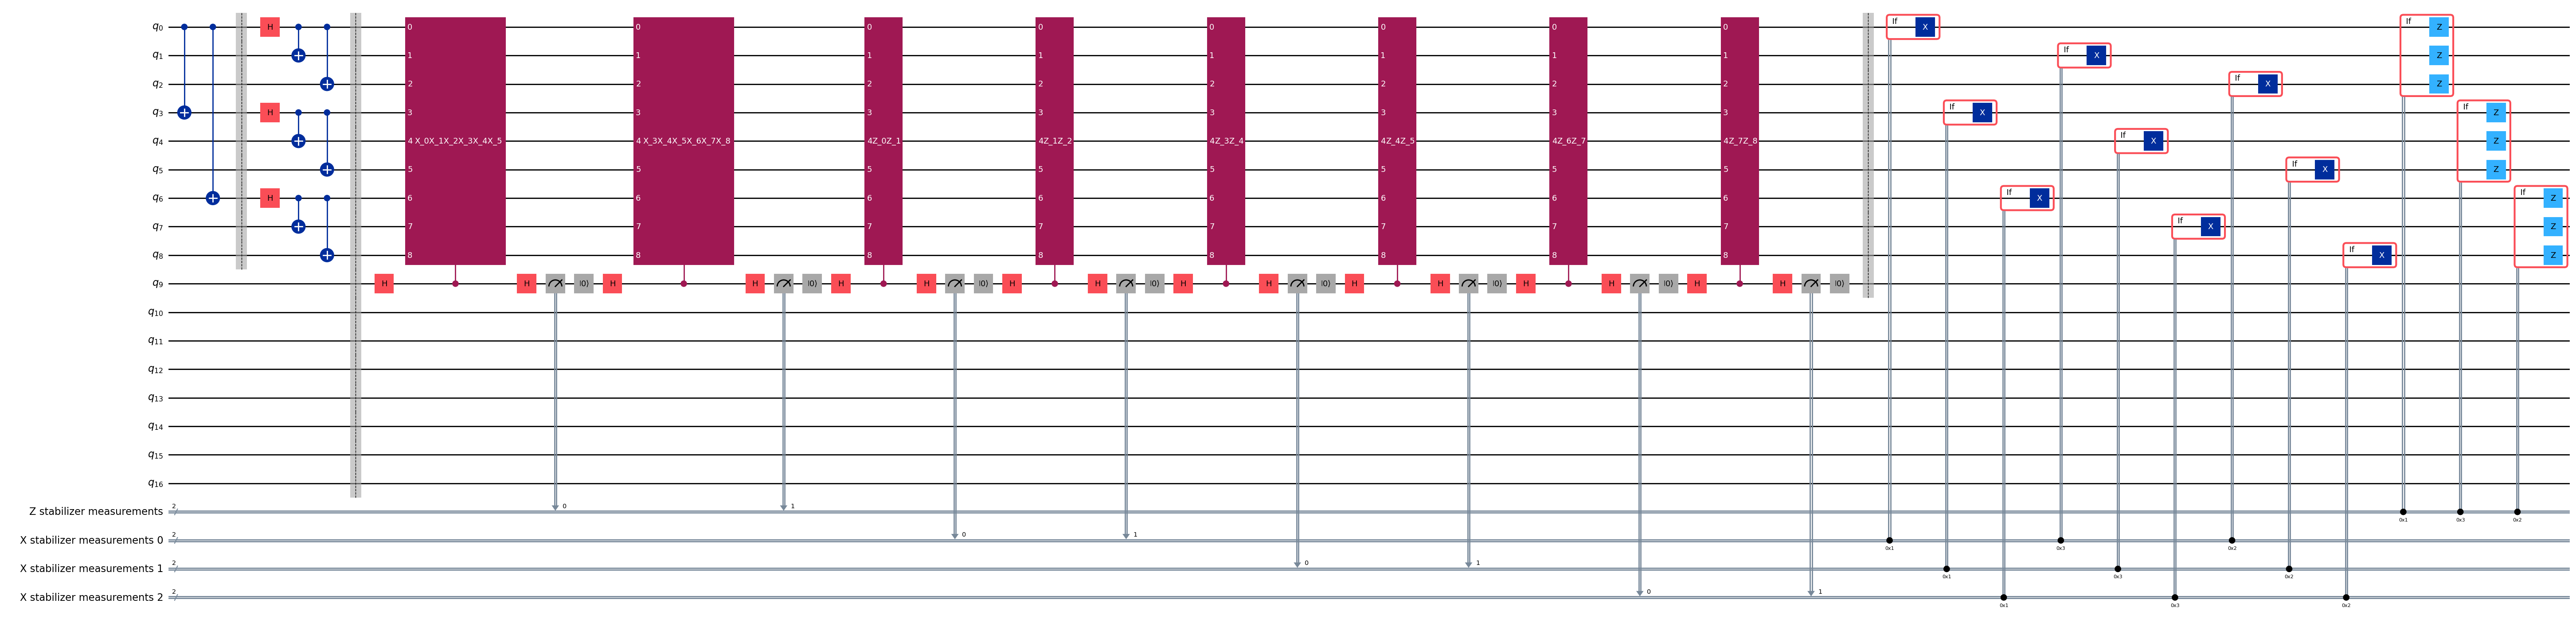

In [7]:
qc = sq.circuit()

qc.draw('mpl', fold=-1)